1183 296


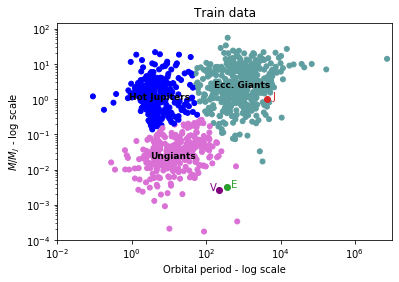

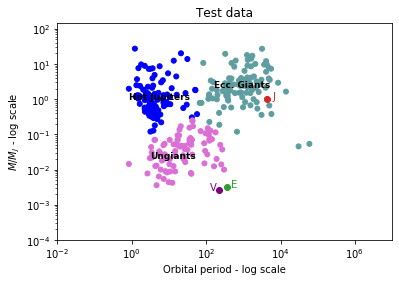

In [12]:
%run read+groups.ipynb

In [13]:
%run scripts.py

<Figure size 432x288 with 0 Axes>

In [14]:
param_Teff=['obj_orb_period_day','obj_phys_mass_mjup', 'obj_phys_radius_rjup',
           'obj_parent_phys_teff_k','obj_orb_ecc','obj_orb_a_au','obj_parent_phys_radius_rsun']

data_US, data_EU = exo_sol(file_US,cat_solar,param_Teff), exo_sol(file_EU,cat_solar,param_Teff)
add_temp_eq_dataset(data_US), add_temp_eq_dataset(data_EU)

data_US=data_US[['obj_phys_mass_mjup', 'obj_orb_period_day','temp_eq']]
data_EU=data_EU[['obj_phys_mass_mjup', 'obj_orb_period_day','temp_eq']]
data_US, data_EU = data_US.drop('MOON'), data_EU.drop('MOON') #drop

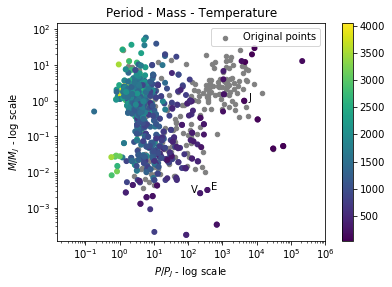

In [15]:
M_US, P_US, T_US = data_US['obj_phys_mass_mjup'], data_US['obj_orb_period_day'], data_US['temp_eq']
M_EU, P_EU, T_EU = data_EU['obj_phys_mass_mjup'], data_EU['obj_orb_period_day'], data_EU['temp_eq']

plt.scatter(P,M,color='gray',s=20, label = "Original points")
plt.scatter(P_EU, M_EU, c = T_EU, s=20, linewidths=1.5, marker='o')
plt.scatter(P_US, M_US, c = T_US, s=20, linewidths=1.5, marker='o')
for i, n in enumerate(N):
    plt.annotate(planet_name[i],(P_solar[n]+d[i],M_solar[n]),c='k') 
plt.xlabel(r"$P/P_J$ - log scale")
plt.ylabel(r"$M/M_J$ - log scale")
plt.title(r"Period - Mass - Temperature")
plt.xscale('log')
plt.yscale('log')
plt.ylim(12e-5,15e1)
plt.xlim(15e-3,10e5)
plt.legend(loc='upper right')
plt.colorbar()
plt.show()

We can immediately see that:
* We lack orbital parameters to calculate the equilibrium temperature for most eccentric giants (top right);
* In general, from the temperatures we managed to calculate, hot Jupiters (top left) are the planets with highest temperature)
* There are some planets within the ungiants group (lower center) that have very high temperature.

Before calculating the limits for each group, it's important to note that we should drop Pluto off the list (it has a period of $\sim$ 90500 days, while the other ungiants have periods in the hundreds of days). Will also be dropping the Moon.

In [19]:
##finding the equilibrium temperature limits
## using EU database because it has 500 planets left while the US has less than 300
ecc_giants = test.loc[lambda test:test['labels']==0]
hotjups = test.loc[lambda test:test['labels']==1]
ungiants = test.loc[lambda test:test['labels']==2]

ecc_names, hotjup_names, ungt_names = ecc_giants.index, hotjups.index, ungiants.index

ecc_Teq = data_EU.loc[data_EU.index.intersection(ecc_names)]
hotjup_Teq = data_EU.loc[data_EU.index.intersection(hotjup_names)]
ungt_Teq = data_EU.loc[data_EU.index.intersection(ungt_names)]

In [20]:
temps = [ecc_Teq, hotjup_Teq, ungt_Teq]
for i in range(3):
    print(group_names[i])
    print("T min =", "{:2.0f}".format((np.min(temps[i].temp_eq))), "K, T max =","{:2.0f}".format((np.max(temps[i].temp_eq))),"K, T med =","{:2.0f}".format((np.median(temps[i].temp_eq))),"K")
    print("M min =", "{:.1e}".format((np.min(temps[i].obj_phys_mass_mjup))), "M/M_J, M max =","{:.1f}".format((np.max(temps[i].obj_phys_mass_mjup))),"M/M_J, M med =","{:2.2f}".format((np.median(temps[i].obj_phys_mass_mjup))),"M/M_J")
    print("P min =", "{:.1f}".format((np.min(temps[i].obj_orb_period_day))), "days, P max =","{:.1f}".format((np.max(temps[i].obj_orb_period_day))),"days, P med =","{:2.1f}".format((np.median(temps[i].obj_orb_period_day))),"days")

Ecc. Giants
T min = 51 K, T max = 531 K, T med = 122 K
M min = 4.6e-02 M/M_J, M max = 6.8 M/M_J, M med = 1.00 M/M_J
P min = 114.7 days, P max = 59791.4 days, P med = 4346.5 days
Hot Jupiters
T min = 814 K, T max = 2424 K, T med = 1461 K
M min = 4.8e-02 M/M_J, M max = 27.2 M/M_J, M med = 0.84 M/M_J
P min = 0.8 days, P max = 21.1 days, P med = 3.3 days
Ungiants
T min = 199 K, T max = 2189 K, T med = 807 K
M min = 4.2e-03 M/M_J, M max = 0.1 M/M_J, M med = 0.04 M/M_J
P min = 0.8 days, P max = 192.4 days, P med = 11.5 days


We expected:
* Hot jupiters: P $\lesssim 7$ d, $M/M_J \leq 12$; $1000 \lesssim T_{eq} (K) \lesssim 3000$, centered at $M \sim 1 M_J$ and $P = 3$ days. 
* Eccentric giants: $10^2 d \lesssim P \lesssim 10^4 d$; $1 \lesssim M/M_J \leq 10$.
* Ungiants: $P \leq 100 d$; $ M/M_J \lesssim 0.07$ and $R \lesssim 0.35 R_J$

Them median values for T, M and P for each of the groups seem to be according to what was is seen in literature. However, some of the extreme points printed above belong on a greyer area.

Namely,

In [21]:
#"eccentric giant" with smallest period
ecc_Teq.iloc[np.where(ecc_Teq.obj_orb_period_day==np.min(ecc_Teq.obj_orb_period_day))]

Planet,obj_phys_mass_mjup,obj_orb_period_day,temp_eq
Kepler-87 b,1.02,114.73709,530.905185


In [22]:
#"eccentric giant" with smallest mass
ecc_Teq.iloc[np.where(ecc_Teq.obj_phys_mass_mjup==np.min(ecc_Teq.obj_phys_mass_mjup))]

Planet,obj_phys_mass_mjup,obj_orb_period_day,temp_eq
URANUS,0.045622,30571.425,63.602473


In [23]:
#"hot jupiter" with smallest temperature
hotjup_Teq.iloc[np.where(hotjup_Teq.temp_eq==np.min(hotjup_Teq.temp_eq))]

Planet,obj_phys_mass_mjup,obj_orb_period_day,temp_eq
HATS-17 b,1.338,16.254611,814.228475


According to the limits established in literature, for the three groups found:
* Kepler-87-b seems to correctly belong on the ecc giants group;
* Uranus is in a grey area, between ungiant and eccentric giant, probably another group altogether - intermediate mass, cold planets with long orbital periods.
* HATS-17 b seems to correctly belong on the hot jupiters group